In [10]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [15]:
data = pd.read_csv("loan_sanction_test.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
print(data.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [15]:
print(data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


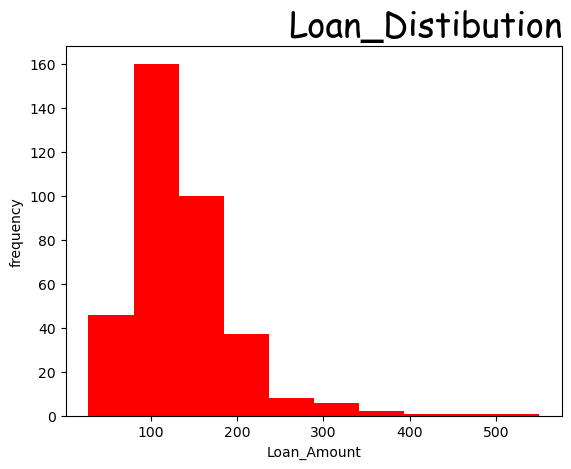

In [14]:
plt.hist(data.LoanAmount, color = 'red')
plt.title('Loan_Distibution',loc = 'right',font = "Comic Sans MS", size = 25)
plt.xlabel('Loan_Amount')
plt.ylabel('frequency')
plt.show()

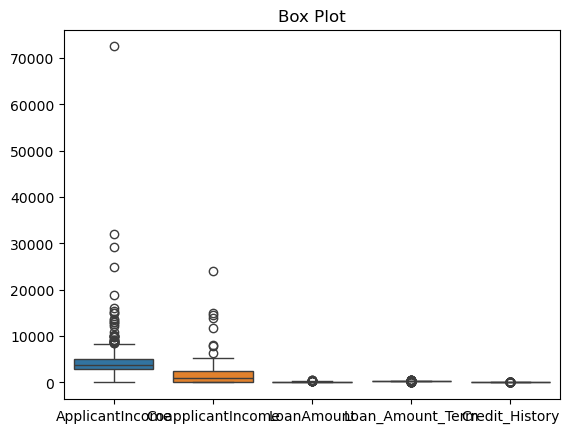

In [18]:
sns. boxplot(data = data)
plt.title("Box Plot")
plt.show()

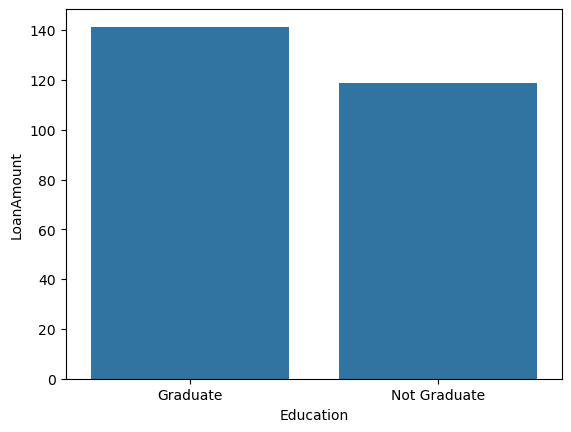

In [38]:
sns.barplot(data  = data  , x = 'Education' , y = 'LoanAmount',  errorbar = ('ci' , False ) )
plt.show()

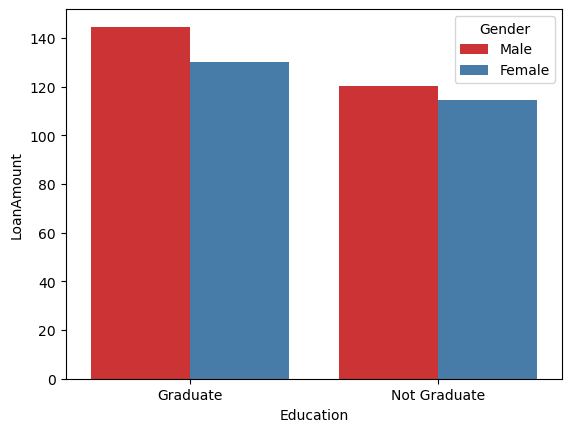

In [17]:
sns.barplot(data=data, x='Education', y='LoanAmount', hue = 'Gender' ,errorbar=None, palette='Set1')
plt.show()

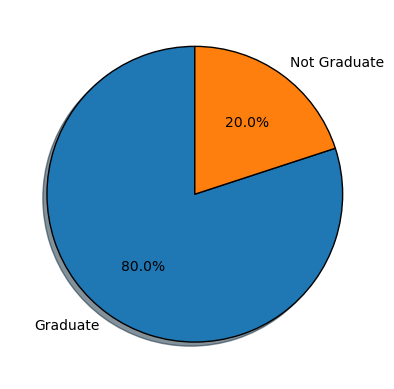

In [48]:
plt.pie(x = seg.LoanAmount,labels = seg.Education,startangle = 90,shadow= True,
       autopct = f'%1.1f%%',wedgeprops = {"edgecolor": "black", "linewidth": 1})
plt.show()

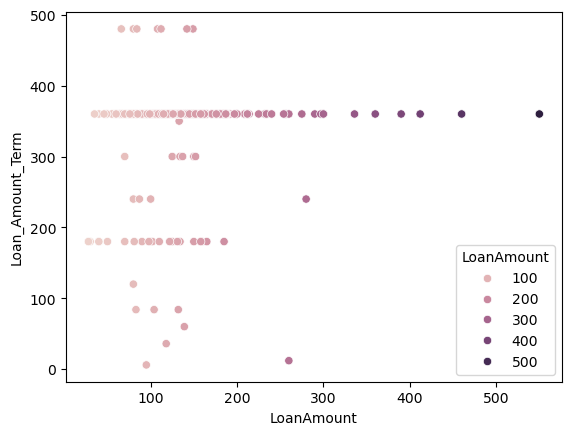

In [80]:
sns.scatterplot(data = data , x = 'LoanAmount' , y = 'Loan_Amount_Term', hue = 'LoanAmount')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

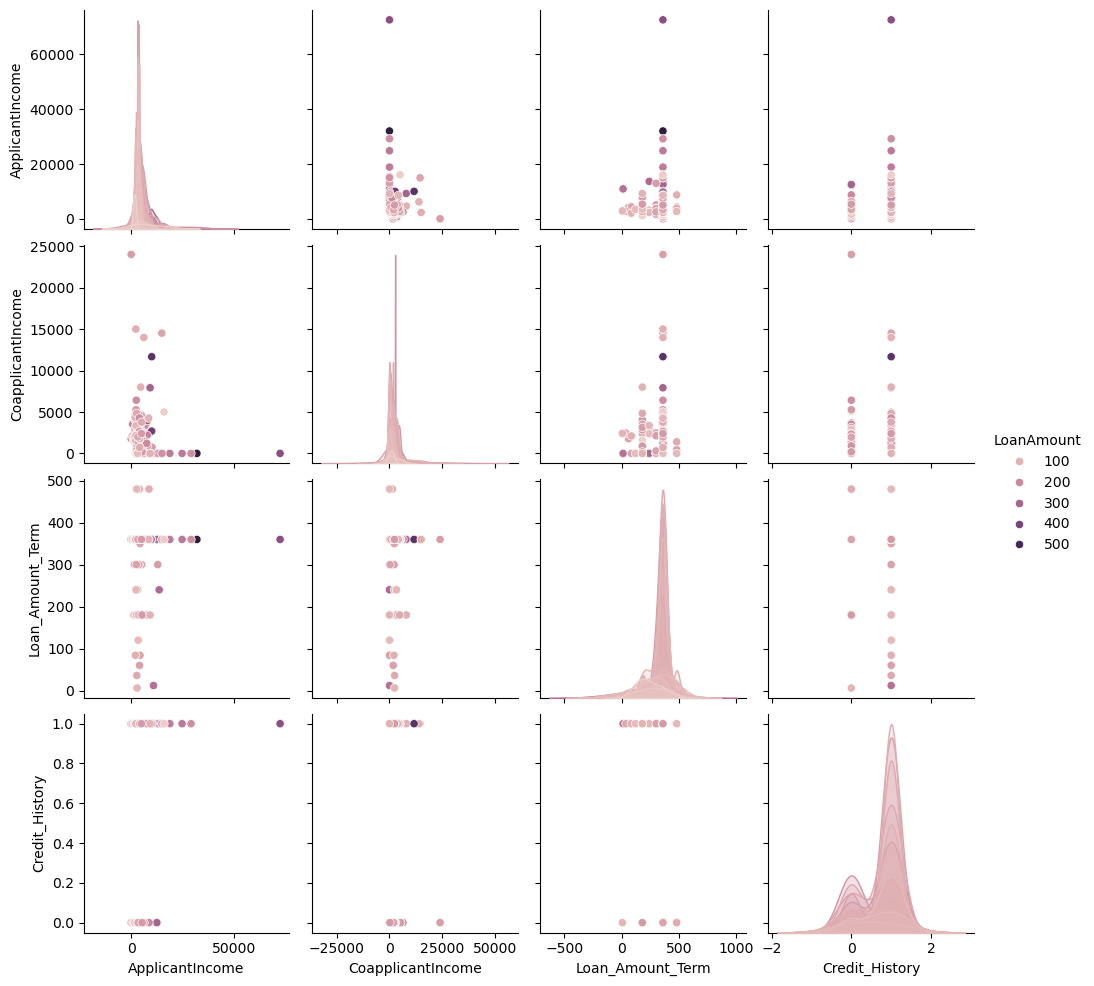

In [8]:
sns.pairplot(data , hue = 'LoanAmount' ,  kind = 'scatter')
plt.show

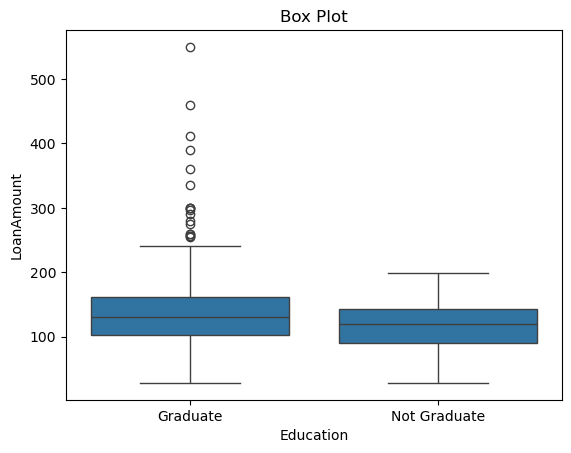

In [14]:
sns.boxplot(data , x = 'Education' , y = 'LoanAmount')
plt.title("Box Plot")
plt.show()

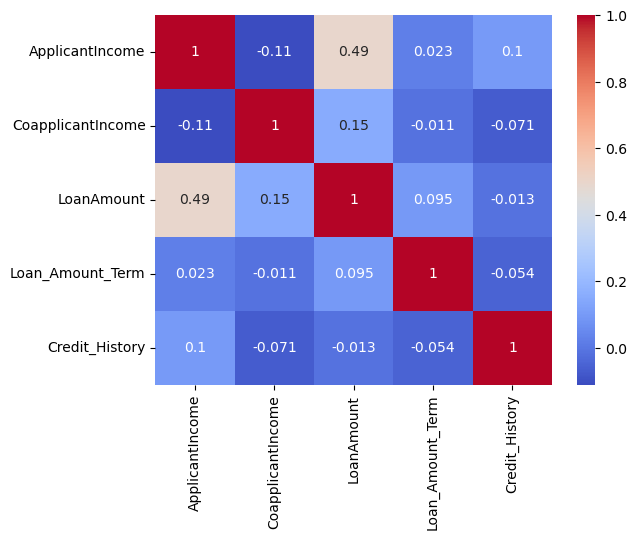

In [16]:
sns.heatmap(data.corr(numeric_only = True) , annot = True , cmap = 'coolwarm')
plt.show()

In [38]:
seg = data.groupby('Education')[['Loan_ID','LoanAmount']].sum().reset_index()
seg

,Education,Loan_ID,LoanAmount
0,Graduate,LP001015LP001022LP001031LP001035LP001059LP0010...,39439.0
1,Not Graduate,LP001051LP001054LP001055LP001056LP001067LP0010...,9841.0


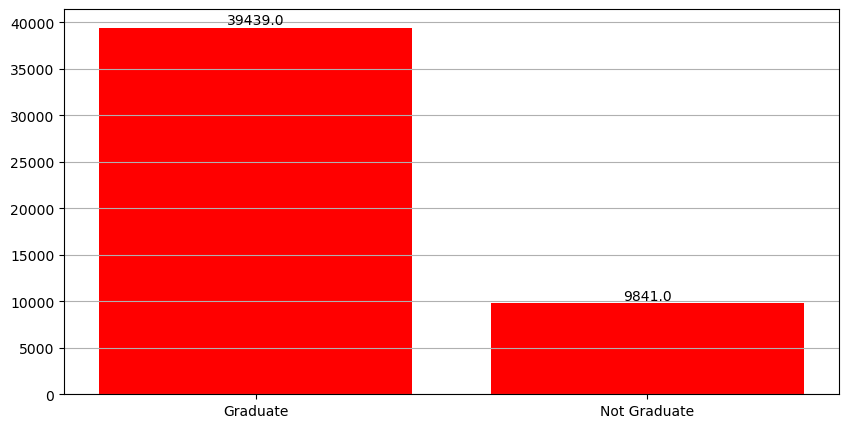

In [42]:
plt.figure(figsize = (10,5))
plt.bar(seg.Education,seg.LoanAmount,color = 'red')
for i in range(len(seg)):
    plt.text(seg.Education[i],seg.LoanAmount[i],str(seg.LoanAmount[i]),ha= 'center',va = 'bottom')
plt.grid(axis = 'y')
plt.show()

In [1]:
import statistics as st

In [37]:
applicant_income = data['ApplicantIncome'].tolist() 
coapplicant_income = data['CoapplicantIncome'].tolist()
std_dev = st.stdev(applicant_income) 
dev= st.stdev(coapplicant_income)
print(std_dev ,dev)

4910.685398980398 2334.232098686346


In [41]:
data.size

4404

In [43]:
data.duplicated().sum()

0

In [103]:
data.Gender.unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [67]:
data.Gender = data.Gender.astype('category')

In [69]:
data.Married.unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [63]:
data.Married = data.Married.astype('category')

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            367 non-null    object  
 1   Gender             367 non-null    category
 2   Married            367 non-null    category
 3   Dependents         357 non-null    object  
 4   Education          367 non-null    object  
 5   Self_Employed      344 non-null    object  
 6   ApplicantIncome    367 non-null    int64   
 7   CoapplicantIncome  367 non-null    int64   
 8   LoanAmount         362 non-null    float64 
 9   Loan_Amount_Term   361 non-null    float64 
 10  Credit_History     338 non-null    float64 
 11  Property_Area      367 non-null    object  
dtypes: category(2), float64(3), int64(2), object(5)
memory usage: 29.8+ KB


In [117]:
data['Gender'].fillna(data['Gender'].mode(), inplace=True)

In [119]:
data.Gender.isnull().sum()

0

In [115]:
data.Gender

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
362    Male
363    Male
364    Male
365    Male
366    Male
Name: Gender, Length: 367, dtype: category
Categories (2, object): ['Female', 'Male']

In [121]:

mode_gender = data['Gender'].mode()[0]

data['Gender'].fillna(mode_gender, inplace=True)